In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
tf.__version__

'2.4.0'

In [22]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [24]:
images = keras.datasets.cifar10.load_data()

In [26]:
(X_train_full, y_train_full), (X_test, y_test) = images
print(f'X_train_full.shape: {X_train_full.shape}')
print(f'X_train_full.dtype: {X_train_full.dtype}')
print(f'y_train_full.shape: {y_train_full.shape}')
print(f'y_train_full.dtype: {y_train_full.dtype}')
print(f'X_test.shape: {X_test.shape}')
print(f'X_test.dtype: {X_test.dtype}')
print(f'y_test.shape: {y_test.shape}')
print(f'y_test.dtype: {y_test.dtype}')

X_train_full.shape: (50000, 32, 32, 3)
X_train_full.dtype: uint8
y_train_full.shape: (50000, 1)
y_train_full.dtype: uint8
X_test.shape: (10000, 32, 32, 3)
X_test.dtype: uint8
y_test.shape: (10000, 1)
y_test.dtype: uint8


In [27]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [28]:
X_valid, X_train = X_train_full[:10000] / 255.0, X_train_full[10000:] / 255.0

values = []
for data in y_train_full:
    values.append(data[0])

y_valid, y_train = np.asarray(y_train_full[:10000], dtype=np.float32), np.asarray(y_train_full[10000:], dtype=np.float32)
# print(f'y_valid.shape: {y_valid.shape}')
# print(f'y_valid.dtype: {y_valid.dtype}')
# print(f'y_train.shape: {y_train.shape}')
# print(f'y_train.dtype: {y_train.dtype}')

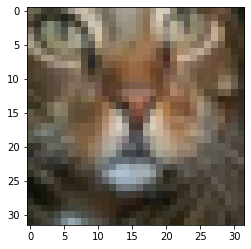

In [29]:
plt.imshow(X_train[5], cmap='gray')

In [30]:
model = keras.models.Sequential()
# model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[32, 32, 3]))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(128, 3, activation="relu", padding="same"))
model.add(keras.layers.Conv2D(128, 3, activation="relu", padding="same"))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(256, 3, activation="relu", padding="same"))
model.add(keras.layers.Conv2D(256, 3, activation="relu", padding="same"))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))


In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        9472      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 256)        

In [32]:
model.compile(loss='sparse_categorical_crossentropy',
optimizer="adam",
metrics=['accuracy'])

In [17]:
history= model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1250/1250 [==============================] - 39s 32ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.0974
Epoch 2/5
1250/1250 [==============================] - 39s 31ms/step - loss: 2.3027 - accuracy: 0.1022 - val_loss: 2.3027 - val_accuracy: 0.0937
Epoch 3/5
1250/1250 [==============================] - 37s 29ms/step - loss: 2.3028 - accuracy: 0.1008 - val_loss: 2.3028 - val_accuracy: 0.1001
Epoch 4/5
1250/1250 [==============================] - 36s 29ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3029 - val_accuracy: 0.0981
Epoch 5/5
1250/1250 [==============================] - 37s 30ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3030 - val_accuracy: 0.0937


In [12]:
model.evaluate(X_test / 255.0 , y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.5449 - accuracy: 0.4485


[1.5449498891830444, 0.44850000739097595]

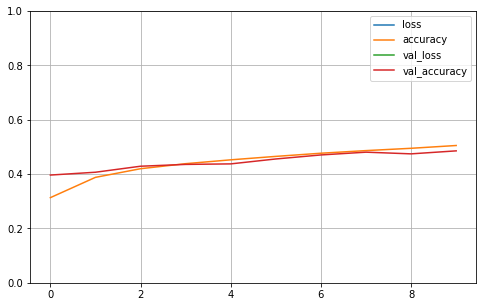

In [32]:


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()